Text(0, 0.5, 'Amplitud (mV)')

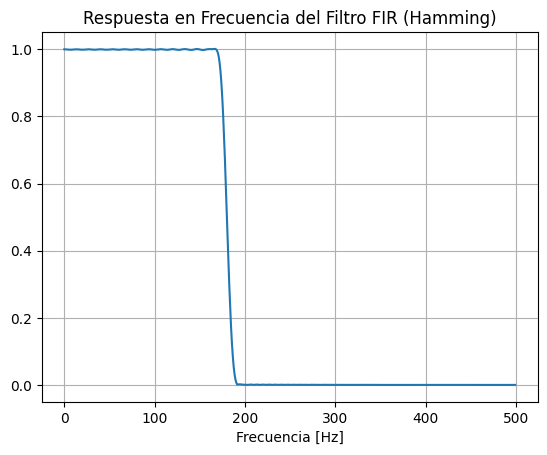

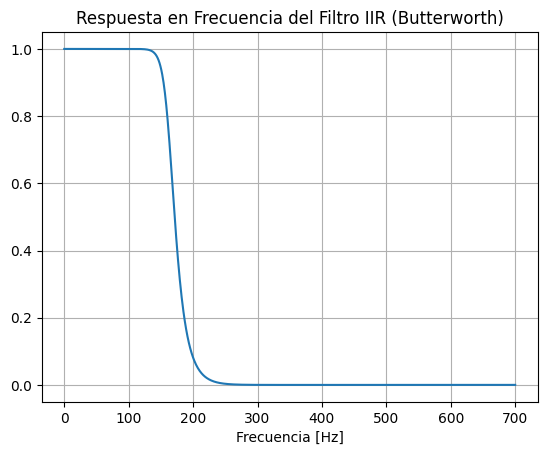

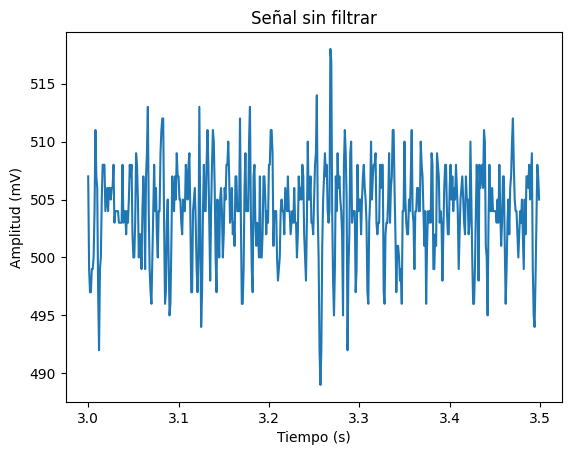

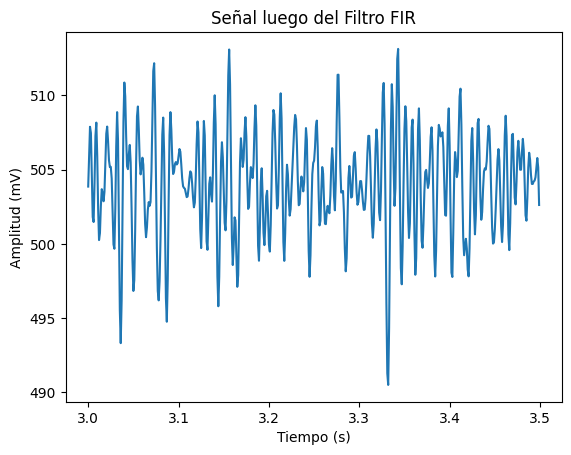

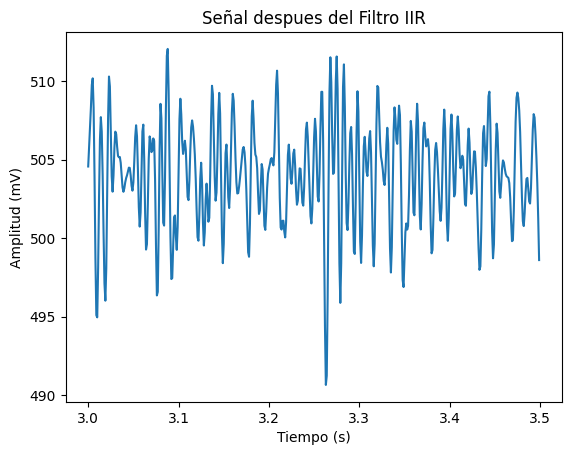

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, freqs, lfilter, iirfilter, butter, buttord, bilinear
import pywt

archivo_txt = "adrian_Reposo.txt"
datos_emg = np.loadtxt(archivo_txt)
emg = datos_emg[:, 5]

fc_FIR = 180 #hz
fc_IIR = 180 #hz
wp = 188 #rad/s
ws = 300 #rad/s

fs = 1000 #hz
tiempo = np.arange(len(emg)) / fs

# FIltros FIR
fir_filter = firwin(150, fc_FIR,window = 'hamming',fs=fs)

# Respuesta en frecuencia del filtro FIR
w, h = freqz(fir_filter)
plt.figure()
plt.plot(0.5*fs*w/np.pi, np.abs(h))
plt.title('Respuesta en Frecuencia del Filtro FIR (Hamming)')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

# Filtro IIR
wc = fc_IIR*2*np.pi
N_ord, Wc = buttord(wp, ws, gpass=3, gstop=40, analog=True)
b,a = butter(N_ord, wc, 'lowpass', True, 'ba')
bd, ad = bilinear(b,a,fs)

# Respuesta en frecuencia del IIR
Fmax=700
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences
W_freqs, H = freqs(b,a,W_freqs)
w, h = freqz(bd, ad, W_freqs/fs)

Hm=np.abs(h)
plt.figure()
plt.plot(F_freqs, Hm)
plt.title('Respuesta en Frecuencia del Filtro IIR (Butterworth)')
plt.xlabel("Frecuencia [Hz]")
plt.grid(True)

# Aplicacion de los filtros

emgFIR = lfilter(fir_filter,1.0,emg)
emgIIR = lfilter(bd,ad, emg)

# Grafico de la señal original (cruda)
#senal_sin_filtrar_norm = ecg_datos / max(abs(ecg_datos)) #Se normalizan los valores
plt.figure()
plt.plot(tiempo[3000:3500],emg[3000:3500], label='Señal sin filtrar')
plt.title("Señal sin filtrar")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")

# Grafico de la señal despues del filtro FIR
plt.figure()
plt.plot(tiempo[3000:3500],emgFIR[3000:3500])
plt.title('Señal luego del Filtro FIR')
plt.xlabel('Tiempo (s)')
plt.ylabel("Amplitud (mV)")

# Graficando la señal despues del filtro IIR
plt.figure()
plt.plot(tiempo[3000:3500],emgIIR[3000:3500])
plt.title('Señal despues del Filtro IIR')
plt.xlabel('Tiempo (s)')
plt.ylabel("Amplitud (mV)")




